In [1]:
import numpy as np
import os
import segyio

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
expname = 'homoRB_pointrecs'
projpath = '../../FDModelling/homoRB_pointrecs/'

In [3]:
# expname = 'homoRB'
# projpath = '../../FDModelling/HomoLabRockBlock/'

# expname = 'LRBDASgeom'
# projpath = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/HomoLRB_DAS'


snappath = os.path.join(projpath,'outputs/snap/')
seispath = os.path.join(projpath,'outputs/su/')

In [4]:
abs_bounds = 30 # boundary points

dx = dy = dz = 0.005  # 5mm
dimlims = 0.4 + 2*(abs_bounds*dx) # 40cm cubed
nx = ny = nz = int(dimlims/dx) 
print(nx)
# dimlims = nx*dx

nr = 384

140


# SNAPS

In [5]:
snap_sbsmp = 2
snap_file = os.path.join(snappath,'%s.bin.vz'%expname)

p_snaps_1d = np.fromfile(snap_file,dtype='<f')

snap_nx = int(nx/snap_sbsmp )
snap_ny = int(ny/snap_sbsmp )
snap_nz= int(nz/snap_sbsmp )
nsnaps = int(p_snaps_1d.shape[0]/(snap_nx*snap_ny*snap_nz))

p_snaps = p_snaps_1d.reshape([nsnaps, snap_nx, snap_ny, snap_nz])
p_snaps = np.transpose(p_snaps,[0,3,1,2])
p_snaps = p_snaps/np.max(abs(p_snaps))

In [6]:
np.unravel_index(np.argmax(p_snaps),p_snaps.shape)

(214, 34, 35, 34)

(<Figure size 800x800 with 3 Axes>,
 (<Axes: xlabel='x samples', ylabel='t samples'>,
  <Axes: xlabel='y samples'>,
  <Axes: ylabel='y samples'>))

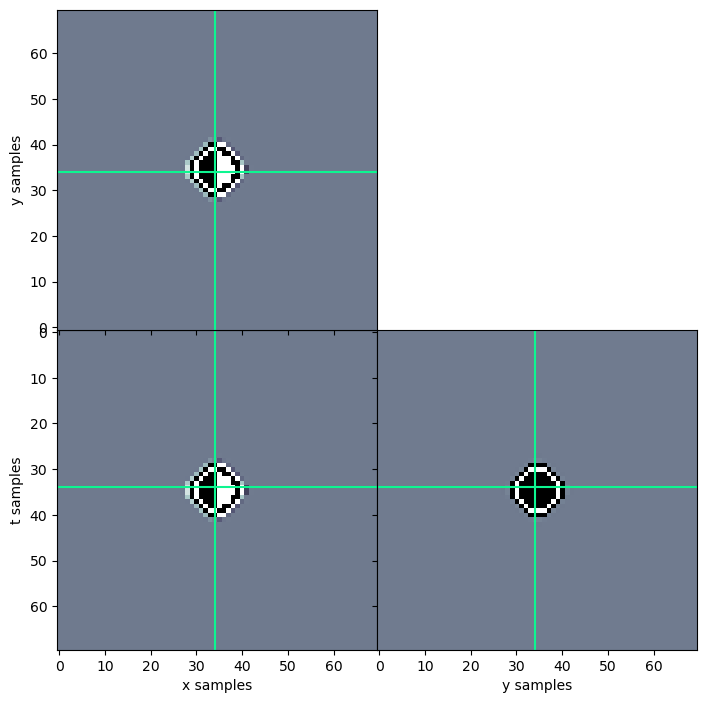

In [14]:
explode_volume(p_snaps[30], p=99.8, x=34, t=34, y=34)

/tmp/ipykernel_12285/555760508.py:3: RuntimeWarning: invalid value encountered in true_divide
  ax.imshow(p_snaps[i*25,:,:,34].T/np.max(abs(p_snaps[i*25,:,:,34])),


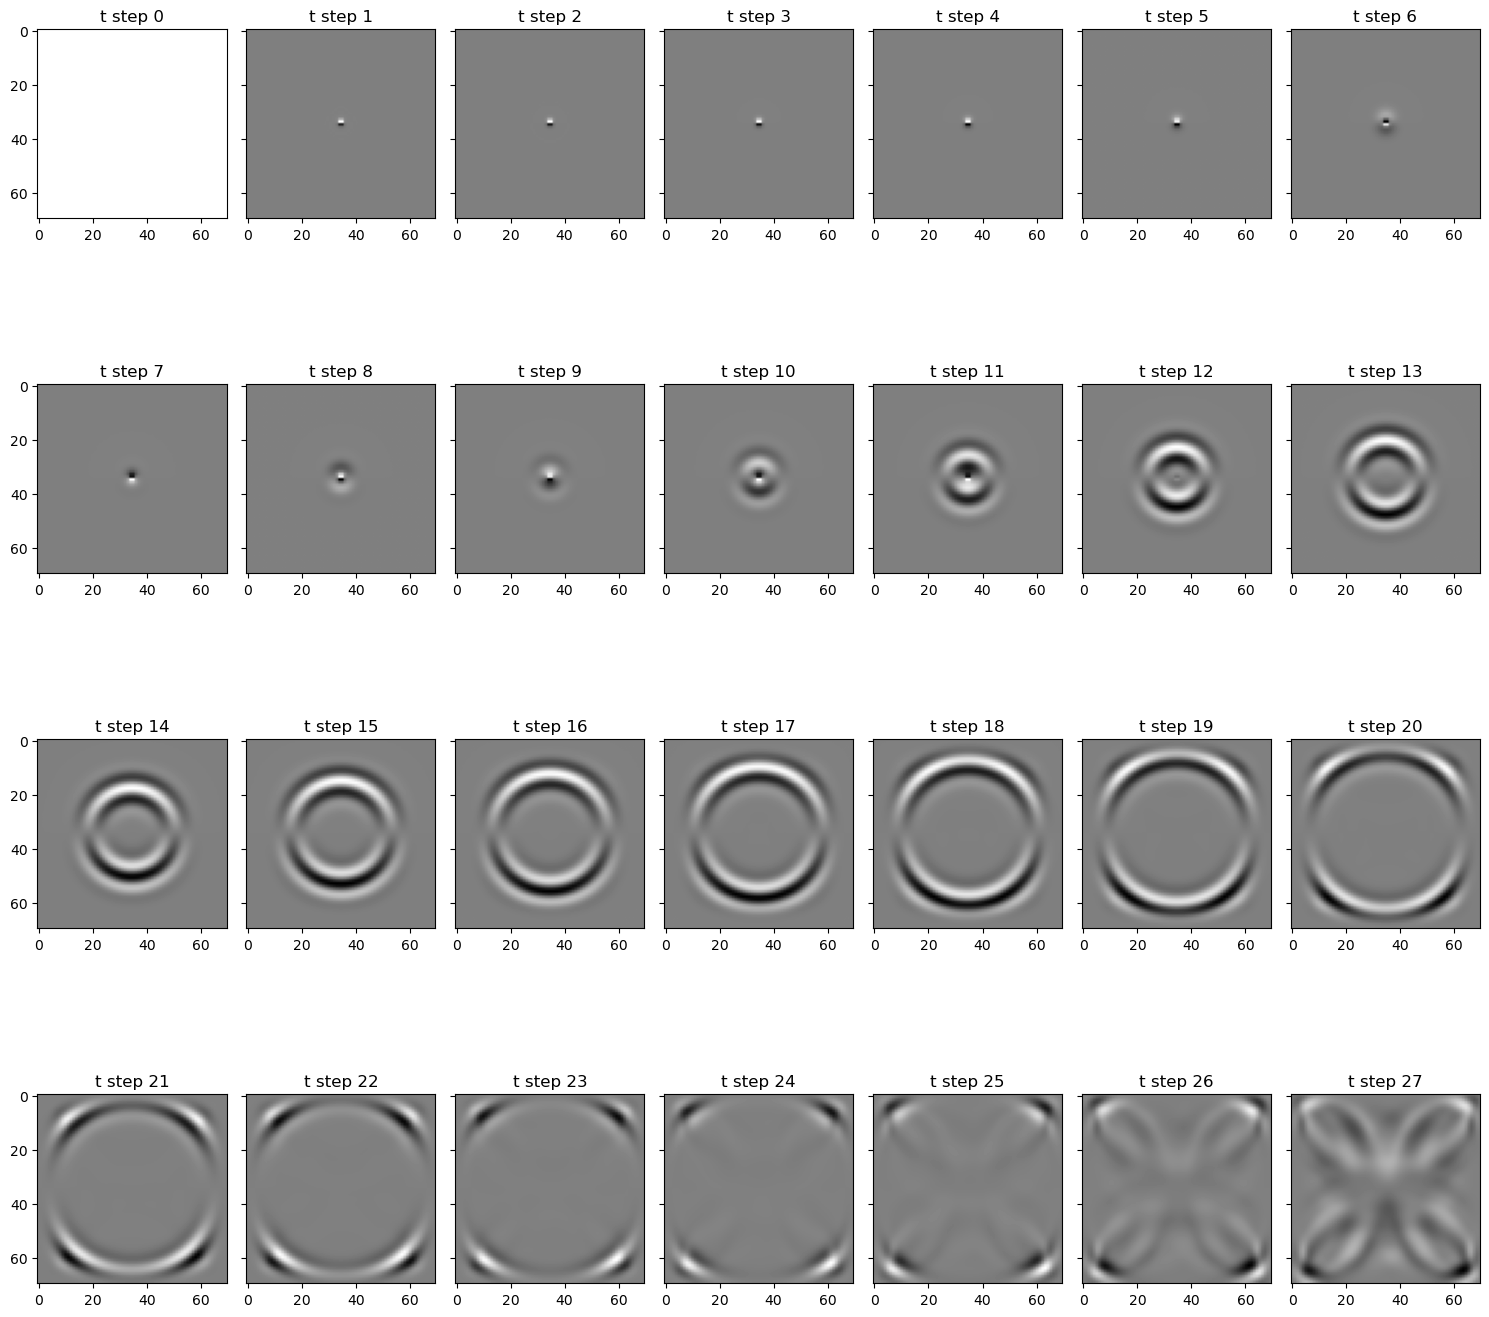

In [15]:
fig,axs = plt.subplots(4,7, figsize=[15,15], sharey=True)
for i,ax in enumerate(axs.ravel()):
    ax.imshow(p_snaps[i*25,:,:,34].T/np.max(abs(p_snaps[i*25,:,:,34])),  
                          cmap='binary', vmin=-1, vmax=1, 
                         )
    ax.set_title('t step %i'%i)
# for ax in axs.ravel(): ax.set_yticks([]); ax.set_xticks([])
plt.tight_layout()

# Receivers

In [9]:
vz_file = os.path.join(seispath,'%s_vz.txt'%expname)
# s_wave_file = os.path.join(data_path,'test.bin.curl')
vz_flat = np.loadtxt(vz_file,delimiter="\n")
nt = int(vz_flat.shape[0]/nr)
print('nt:%i, nr:%i'%(nt,nr))

try: 
    vz_flat.reshape((nr,nt))
except:
    print('Not good dims \n nt:%i nr:%i \n vz flat:%i'%(nt,nr,vz_flat.shape[0]))
    
vz = vz_flat[:nt*nr].reshape((nr,nt))

nt:10000, nr:384


In [10]:
try: 
    vz_flat.reshape((nr,nt))
except:
    print('Not good dims \n nt:%i nr:%i \n vz flat:%i'%(nt,nr,vz_flat.shape[0]))
    
vz = vz_flat[:nt*nr].reshape((nr,nt))
print(np.max(vz[:1000]))


9.723821e-05


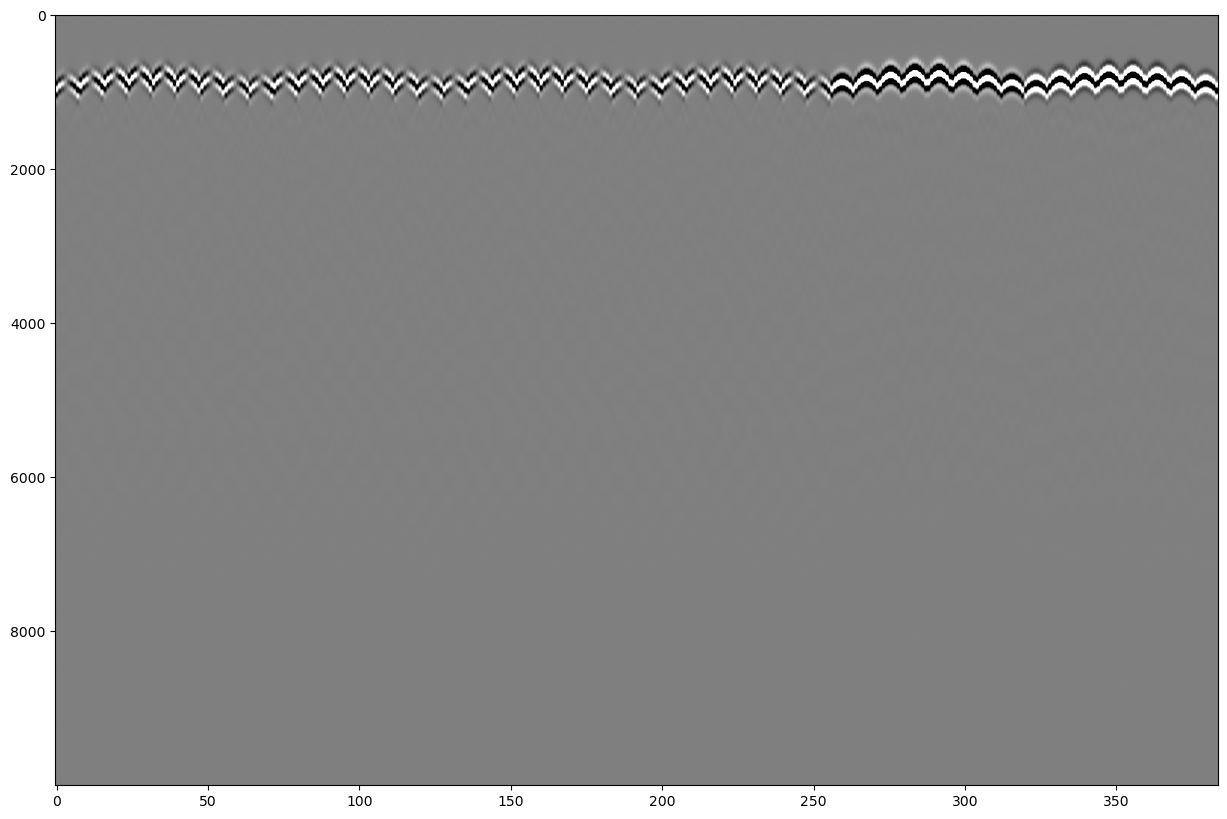

In [11]:
seislim = np.percentile(abs(vz[:6500]),99.)
vmin=-1*seislim
vmax=seislim    
cmap='binary'
              
plt.figure(figsize=[15,10])
plt.imshow(vz.T, aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation=None)

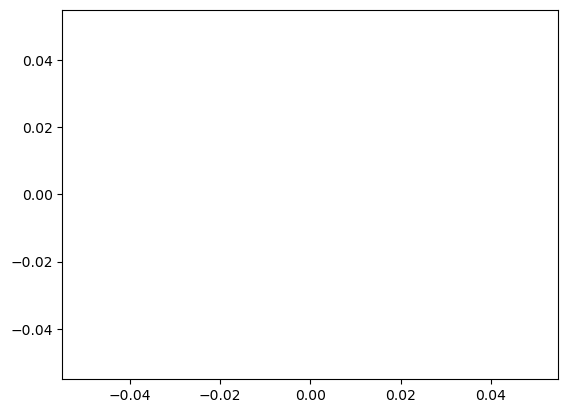

In [12]:
plt.plot(vz[5950:6050,3000])

ValueError: zero-size array to reduction operation maximum which has no identity

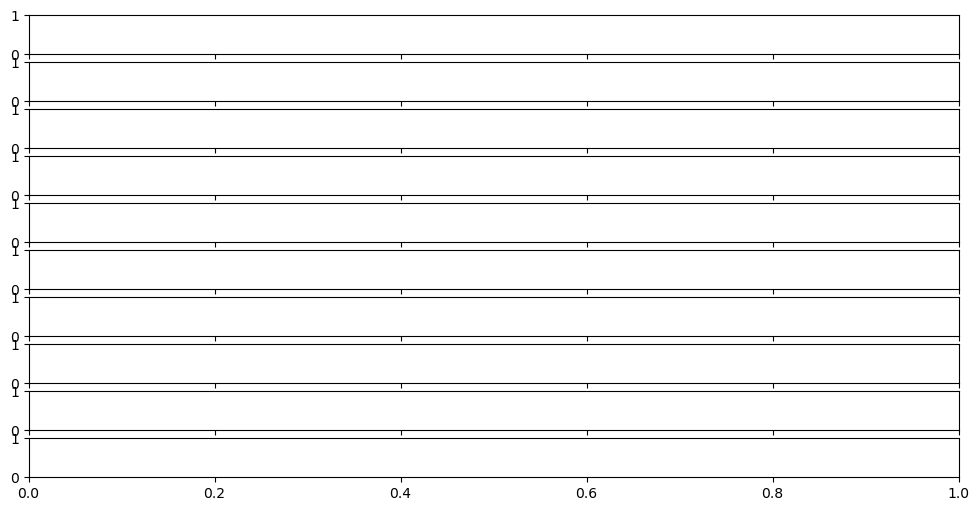

In [13]:
wiggleplot(vz[5950:6050,::1000].T);